# Boosting

In this notebook, we will implement **multiclass MNIST digit recognition classifier** with **boosting**:
- AdaBoost
- GradienBoosting
- XGBoost

# Imports

In [1]:
# plotting utility
import matplotlib.pyplot as plt

%matplotlib inline

# dataset loading through mnist
from keras.datasets import mnist

# training three classifiers:
# AdaBoostClassifier, GradientBoostingClassifier, XGBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# model selection utilities for training and test split and cross valiation
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

# use shuffle-split cross validation for this exercise
from sklearn.model_selection import ShuffleSplit

# make use of confusion matrix and classification report to evaluate performance on the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# the model is defined through pipeline utility
from sklearn.pipeline import Pipeline

In [10]:
# To hide all the warnings
import warnings
warnings.filterwarnings('ignore')

# Loading MNIST dataset

We begin by loafing MNIST dataset with `load_data` in `mnist` class.

We obtain:
- Training feature matrix and labels
- Test feature matrix and labels

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

There are $60000$ examples in training set and $10000$ examples in the test set.

Each example is a grey scale image of $28 \times 28$. There are $10$ different labels - one for each digit - $0$ to $9$.

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Before using the dataset for training and evaluation, we need to flatten it into a vector. After flattening, we have training and test examples represented with a vector of $784$ features. Each feature records pixrl intensity in each of $28 \times 28$ pixel.

We normalize the pixel intensity by dividing it with the maximum value i.e. $255$. In that sense we have each feature value in the range of $0$ to $1$.

In [4]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing
X_train = X_train/255
X_test = X_test/255

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


We use `ShuffleSplit` cross validation with $10$ splits and $20\%$ of the data set aside for model evaluation as a test data.

In [6]:
shufflesplit_cv = ShuffleSplit(
    n_splits=10,
    test_size=0.2,
    random_state=69
)

We define $2$ functions:

1. `train_classifiers` contains a common code for training MNIST multiclass classification problem.
    - It takes `estimator`, feature matrix, labels, cross validation strategy and name of the classifier as input.
    - It first fits the estimator with feature matrix and labels.
    - It obtains cross validated `f1_macro` score for training set with `10`-fold `ShuffleSplit` cross validation and prints it.

In [7]:
def train_classifiers(estimator, X_train, y_train, cv, name):
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=cv,
        scoring='f1_macro'
    )

    print(f"On an average, {name} model has f1 score of " f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.")

2. The `eval` function takes estimator, test feature matrix and labels as input and produce classification report and confusion matrix.
    - It first predicts labels for the test set.
    - The n it uses these predicted reports for calculating various evaluation metrics like precision, recall, f1 score and accuracy for each of the $10$ classes.
    - It also obtains a confusion matrix by comparing these predictions with the actual labels and displays it with `ConfusionMatrixDisplay` utility.

In [8]:
def eval(estimator, X_test, y_test):
    y_test_hat = estimator.predict(X_test)

    print("# Classification report: ")
    print(classification_report(y_test, y_test_hat))

    print("# Confusion matrix: ")
    disp = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(y_test, y_test_hat)
    )
    disp.plot()
    plt.show()

Let's train three classifiers with default parameters.
- **AdaBoostClassifier** that uses the decision stumps as weak learners.
- **GradientBoostingClassifier** that uses decision trees as weak learners.
- **XGBoostClassifer**

# AdaBoost

We instantiate a decision tree classifier withh default parameters and train it. The `train_classifier` function prints mean of cross validated `f1-score` and standard deviation on the training set.

In [9]:
abc_pipeline = Pipeline([
    ('classifier', AdaBoostClassifier(random_state=69))
])

train_classifiers(
    abc_pipeline,
    X_train,
    y_train.ravel(),
    cv=shufflesplit_cv,
    name="AdaBoost Classifier"
)

On an average, AdaBoost Classifier model has f1 score of 0.718 +/- 0.008 on the training set.


Let's evaluate the trained classifier on the test set.

# Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       980
           1       0.85      0.94      0.90      1135
           2       0.79      0.58      0.67      1032
           3       0.68      0.67      0.68      1010
           4       0.72      0.72      0.72       982
           5       0.69      0.59      0.64       892
           6       0.72      0.86      0.78       958
           7       0.68      0.78      0.73      1028
           8       0.66      0.68      0.67       974
           9       0.62      0.55      0.58      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.73     10000

# Confusion matrix: 


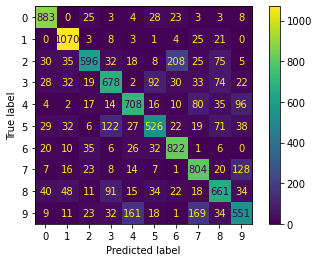

In [10]:
eval(
    abc_pipeline,
    X_test,
    y_test
)

# GradientBoosting

We instantiate a Gradient Boosting classifier object with default parameters and train it.

Observe the mean `f1_score` and its standard deviation obtained by the classifier based on $10$-fold cross validation on the training set.

In [ ]:
gbc_pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=69))
])
train_classifiers(
    gbc_pipeline,
    X_train,
    y_train.ravel(),
    cv=shufflesplit_cv,
    name="GradientBoosting Classifier"
)

Let's evaluate the trained classifier on the test set.

In [ ]:
eval(
    gbc_pipeline,
    X_test,
    y_test
)

# XGBoost

In [11]:
from xgboost import XGBClassifier

In [12]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: bool = True, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |      use_label_encoder : bool
 |          (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
 |          code, we recommend that you set this parameter to False.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      learning_rate : Optional[float]
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : Optional[int]
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 

In [ ]:
xgb_pipeline = Pipeline([
    ('classifier', XGBClassifier())
])

train_classifiers(
    xgb_pipeline,
    X_train,
    y_train.ravel(),
    cv=shufflesplit_cv,
    name="XGBoost Classifer"
)

In [ ]:
eval(
    xgb_pipeline,
    X_test,
    y_test
)